In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi']=300
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df=pd.read_csv("mpg.csv")

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


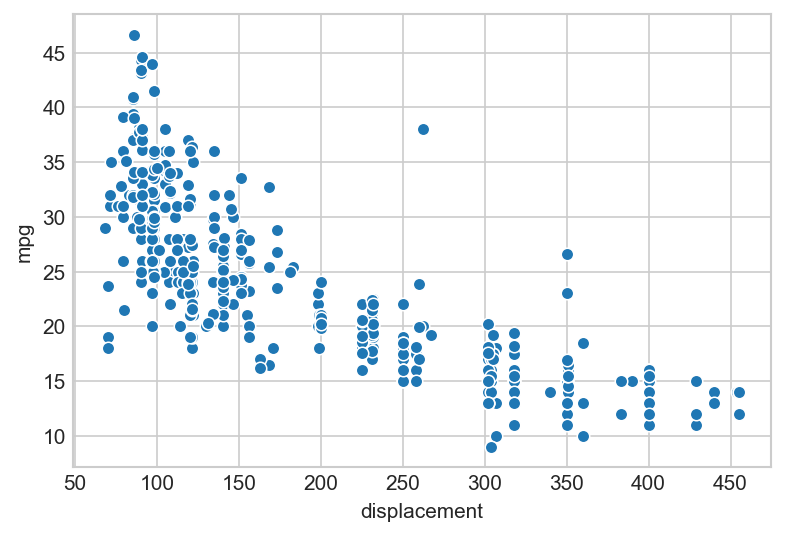

In [10]:
plt.figure(dpi=150)
sns.scatterplot(mpg_data['displacement'],mpg_data['mpg'])
plt.show()

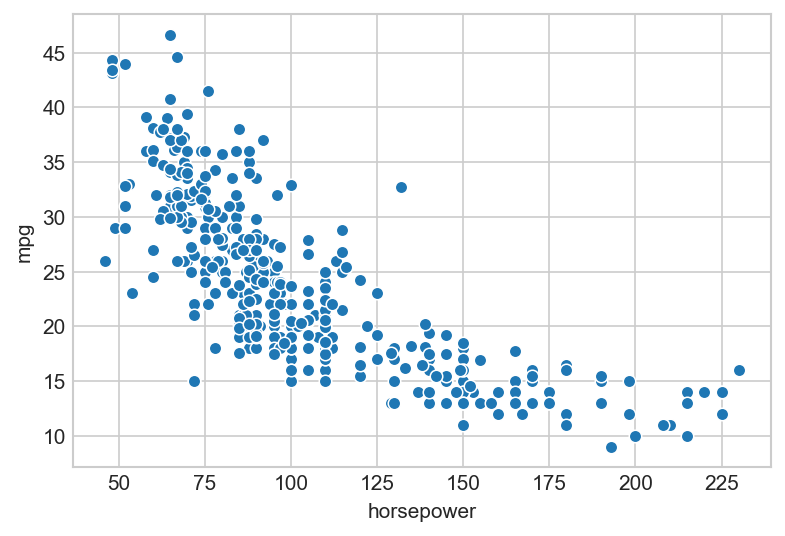

In [11]:
plt.figure(dpi=150)
sns.scatterplot(mpg_data['horsepower'],mpg_data['mpg'])
plt.show()

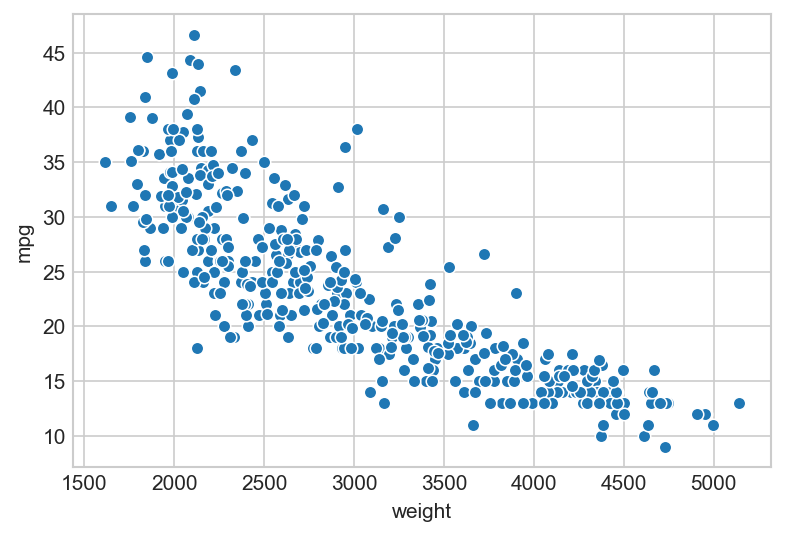

In [12]:
plt.figure(dpi=150)
sns.scatterplot(mpg_data['weight'],mpg_data['mpg'])
plt.show()

In [13]:
np.corrcoef(mpg_data['horsepower'],mpg_data['mpg'])

array([[nan, nan],
       [nan,  1.]])

In [14]:
mpg_data=df[['mpg','displacement','horsepower','weight']]
mpg_data

,mpg,displacement,horsepower,weight
0,18.0,307.0,130.0,3504
1,15.0,350.0,165.0,3693
2,18.0,318.0,150.0,3436
3,16.0,304.0,150.0,3433
4,17.0,302.0,140.0,3449
...,...,...,...,...
393,27.0,140.0,86.0,2790
394,44.0,97.0,52.0,2130
395,32.0,135.0,84.0,2295
396,28.0,120.0,79.0,2625


In [15]:
mpg_data.isna().sum()

mpg             0
displacement    0
horsepower      6
weight          0
dtype: int64

In [22]:
import warnings
warnings.filterwarnings(action='ignore')

In [23]:
mpg_data.dropna(axis = 0, inplace=True)

In [24]:
mpg_data.isna().sum()

mpg             0
displacement    0
horsepower      0
weight          0
dtype: int64

In [25]:
target=mpg_data['mpg']

features=mpg_data[['displacement','horsepower','weight']]

In [26]:
target.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [27]:
features.head()

,displacement,horsepower,weight
0,307.0,130.0,3504
1,350.0,165.0,3693
2,318.0,150.0,3436
3,304.0,150.0,3433
4,302.0,140.0,3449


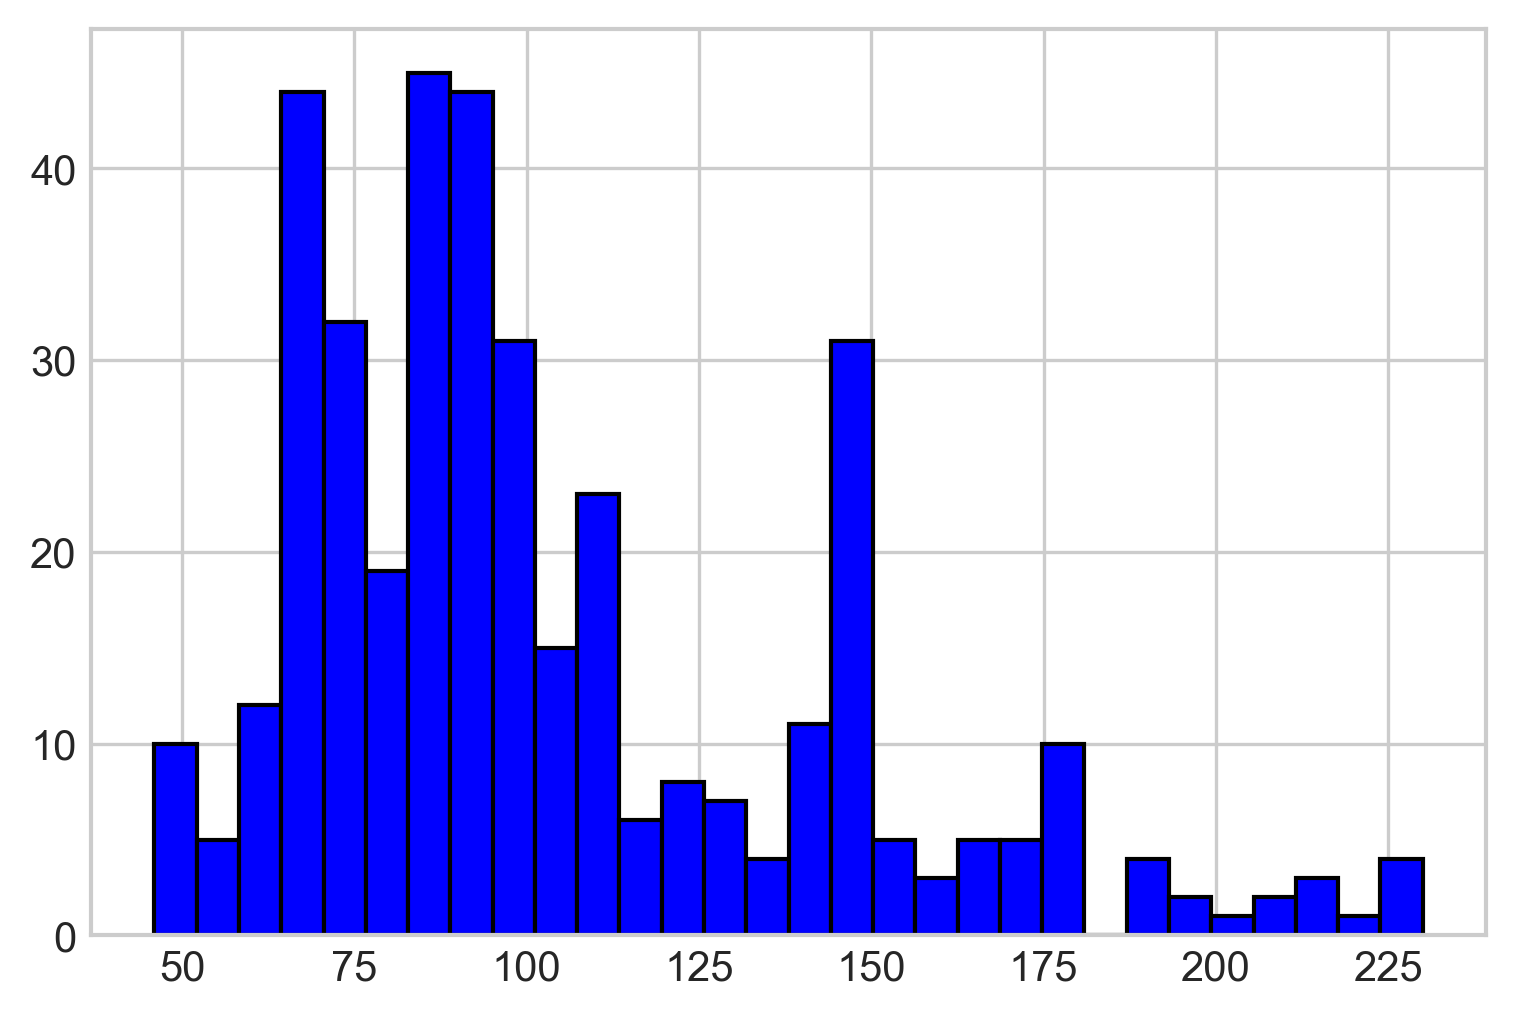

In [28]:
plt.hist(mpg_data['horsepower'],bins=30,ec='k',color='blue')
plt.show()

In [29]:
x_train, x_test, y_train, y_test= train_test_split(features,target,test_size=0.2)

In [30]:
x_train.head()

,displacement,horsepower,weight
279,98.0,68.0,2135
260,225.0,110.0,3620
269,105.0,75.0,2230
136,302.0,140.0,4141
226,231.0,105.0,3425


In [31]:
y_train.head()

279    29.5
260    18.6
269    30.9
136    16.0
226    20.5
Name: mpg, dtype: float64

In [32]:
features.isna().sum()

displacement    0
horsepower      0
weight          0
dtype: int64

In [43]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
lin_pred=model.predict(x_test)

In [46]:
print(f"Accuracy: {r2_score(y_test,lin_pred)*100:.2f}")

Accuracy: 68.31


In [48]:
train_pred=model.predict(x_train)
print(f"Accuracy:{r2_score(y_train,train_pred)*100:.2f}")

Accuracy:71.14


In [49]:
model.coef_

array([-0.00469239, -0.04344075, -0.00555315])

In [50]:
model.intercept_

45.48390876717376

In [51]:
pred = model.predict(x_test)
pred[:5]

array([10.29992251, 29.46945745, 29.63264909, 22.13071325, 16.62353922])

In [52]:
y_test[:5]

156    16.0
382    34.0
172    25.0
191    22.0
215    13.0
Name: mpg, dtype: float64

In [53]:
r2_score(y_test, pred)

0.6831143348334855

In [54]:
import pickle
fp=open('mpg_df.pk1','wb')
pickle.dump(model,fp)
fp.close()

In [66]:
import tkinter as tk
import PIL.Image
import PIL.ImageTk

with open('mpg_df.pk1', 'rb') as fp:
    model = pickle.load(fp)
    fp.close()
    
root=tk.Tk()
root.title('MPG Predictor')

canvas = tk.Canvas(root, height=300, width=600)
canvas.pack()


dis=tk.IntVar()
hpower=tk.IntVar()
weight=tk.IntVar()

def clear():
    dis.set('')
    hpower.set('')
    weight.set('')
clear()
l=tk.Label(root,text='MPG Calculator', bd=2)
l.config(bg='#4C4646',fg='red', font=('Comic Sans MS', 20, 'bold'))
l.place(relx=0.5, rely=0.05, relwidth=0.5, relheight=0.1, anchor='n')

l1 = tk.Label(root, text="Displacement".center(20)+" : ")
l1.config(bg='#008000', fg='black', font=('Comic Sans MS', 18, 'bold'))
l1.place(relx=0.025, rely=0.6, relwidth=0.4, relheight=0.1)

e1 = tk.Entry(root,textvariable=dis,bg='#3E3E43',fg='#FFFFFF',font=('Comic Sans MS', 18))
e1.place(relx=0.4, rely=0.6, relwidth=0.15, relheight=0.1)

l2 = tk.Label(root, text="Horse Power".center(20)+" : ")
l2.config(bg='#008000', fg='black', font=('Comic Sans MS', 18, 'bold'))
l2.place(relx=0.025, rely=0.7, relwidth=0.4, relheight=0.1)

e2 = tk.Entry(root,textvariable=hpower,bg='#3E3E43',fg='#FFFFFF',font=('Comic Sans MS', 18))
e2.place(relx=0.4, rely=0.7, relwidth=0.15, relheight=0.1)

l3 = tk.Label(root, text="Weight".center(20)+" : ")
l3.config(bg='#008000', fg='black', font=('Comic Sans MS', 18, 'bold'))
l3.place(relx=0.025, rely=0.8, relwidth=0.4, relheight=0.1)

e3 = tk.Entry(root,textvariable=weight,bg='#3E3E43',fg='#FFFFFF',font=('Comic Sans MS', 18))
e3.place(relx=0.4, rely=0.8, relwidth=0.15, relheight=0.1)

b1 = tk.Button(root, text='Generate MPG', command=lambda : predict())
b1.config(bg='red', fg='white', font=('Comic Sans MS', 18, 'bold'))
b1.place(relx=0.58, rely=0.8, relwidth=0.4, relheight=0.1)

def predict():
    d = dis.get()
    hp = hpower.get()
    w = weight.get()
    features = [ [ d, hp, w ] ]
    clear()
    m = model.predict(features)[0]
    print("MPG of Car : ", m)
    win = tk.Toplevel(root)
    win.grab_set()
    text = f"""
    Displacement : {d}
    Horse Power  : {hp}
    Weight         : {w}
    MPG            : {m:.2f}
    """
    msg = tk.Message(win, text=text)
    msg.config(bg='red', fg='black', font=('Comic Sans MS', 25, 'bold'))
    msg.pack(fill=tk.BOTH, expand=tk.YES)
    
    
    eb = tk.Button(win, text='Exit', command=lambda : win.destroy())
    eb.config(fg='red', bg='cyan', font=('Comic Sans MS', 25, 'bold'),border=5)
    eb.pack(fill=tk.X, expand=tk.YES)
    eb.focus()
    
root.mainloop()

MPG of Car :  19.487572788444687
